<a href="https://colab.research.google.com/github/lyeslehara1996/PFE/blob/main/correction_du_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#declaration des module 

import pandas as pd 
import re 
import nltk

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout

from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
import string as st
SAVEd = False

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
df=pd.read_excel('/content/SemEval2017.xlsx')
df

,ID,Polarity,Comments,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN,NaN,NaN,NaN
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...,NaN,NaN,NaN,NaN
2,619971047195044992,negative,If these runway renovations at the airport pre...,NaN,NaN,NaN,NaN
3,619974445185302016,neutral,If you could ask an onstage interview question...,NaN,NaN,NaN,NaN
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
20628,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...,NaN,NaN,NaN,NaN
20629,681879579129200000,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN,NaN,NaN,NaN
20630,681883903259357056,neutral,Hours before he arrived in Saudi Arabia on Tue...,NaN,NaN,NaN,NaN
20631,681904976860327040,negative,@VanityFair Alex Kim Kardashian worth how to ...,NaN,NaN,NaN,NaN




netoyage de dataset



In [ ]:
df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)
df.drop("Unnamed: 5", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)

df.head()

,ID,Polarity,Comments
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195044992,negative,If these runway renovations at the airport pre...
3,619974445185302016,neutral,If you could ask an onstage interview question...
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...


In [ ]:
df.Polarity.value_counts()

neutral     10342
positive     7059
negative     3231
Name: Polarity, dtype: int64

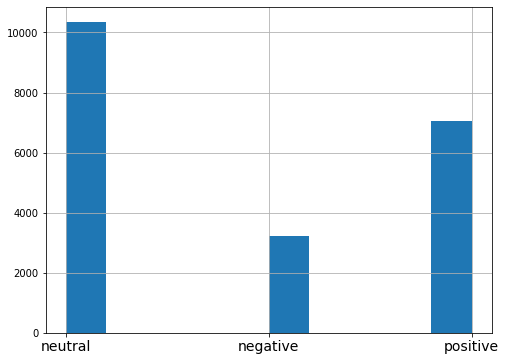

In [ ]:
plt.figure(figsize=(8,6))
df.Polarity.hist(xlabelsize=14)
plt.show()

**Prétraitement de dataSet**

transformer les mots en miniscule


In [ ]:
df_clean = df
df_clean.Comments=df_clean.Comments.str.lower()
df_clean



,ID,Polarity,Comments
0,619950566786113024,neutral,"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235008,neutral,order go set a watchman in store or through ou...
2,619971047195044992,negative,if these runway renovations at the airport pre...
3,619974445185302016,neutral,if you could ask an onstage interview question...
4,619987808317406976,positive,a portion of book sales from our harper lee/go...
...,...,...,...
20628,681877834982232064,neutral,@shaquillehoneal from what i think you're aski...
20629,681879579129200000,positive,"iran ranks 1st in liver surgeries, allah bless..."
20630,681883903259357056,neutral,hours before he arrived in saudi arabia on tue...
20631,681904976860327040,negative,@vanityfair alex kim kardashian worth how to ...


Suppression de tout les symbole  

In [ ]:
df_clean['Comments'] = df_clean['Comments'].apply(lambda x: re.sub(r'https?:\/\/\S+', ' ', str(x)))
df_clean['Comments'] = df_clean['Comments'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", ' ', str(x)))
df_clean['Comments'] = df_clean['Comments'].apply(lambda x: re.sub(r'{link}', ' ', str(x)))
df_clean['Comments'] = df_clean['Comments'].apply(lambda x: re.sub(r'&[a-z]+;', ' ', str(x)))
df_clean['Comments'] = df_clean['Comments'].apply(lambda x: re.sub(r"[^a-z]", ' ', str(x)))
df_clean['Comments'] = df_clean['Comments'].apply(lambda x: re.sub(r'@mention', ' ', str(x)))
df_clean['Comments'] = df_clean['Comments'].apply(lambda x: " ".join(x.lower() for x in str(x).split()  if len(x)>3 ))
df_clean[['Comments']].head()

,Comments
0,picturehouse pink floyd roger waters walll ope...
1,order watchman store through website before tu...
2,these runway renovations airport prevent from ...
3,could onstage interview question miss tomorrow...
4,portion book sales from harper watchman releas...


In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

Suppression de stop words


In [ ]:
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df_clean['Comments']=df_clean['Comments'].apply(remove_stopwords)

{'theirs', 'ourselves', 'those', 'any', 'as', 'into', 'am', 'again', 'further', 'my', 'her', 'ours', 've', "that'll", 'once', "isn't", 'all', 'do', 'when', "hasn't", 'aren', 'their', 'doing', 'y', 'they', 'same', 'won', 'me', 'before', 'o', 'don', 'mightn', 'i', 'hasn', 'wouldn', 'both', 'can', "you'd", 'with', 'should', 'own', 'other', 'nor', 'few', 'which', 'each', 'about', 'that', "don't", 'who', 'this', 'down', 'until', 'm', 'very', 'for', 'below', 'against', "aren't", 'whom', "shouldn't", 'now', 'such', "should've", 'mustn', "mustn't", 'it', 'will', "it's", 'had', 'or', 'shouldn', 'no', 'your', 'yourself', 'through', 'over', 'after', 'out', 'haven', 'having', 't', 'only', "she's", 'some', 'yourselves', 'was', 'doesn', 'to', 'itself', 'himself', 'and', 'being', "wouldn't", 'so', 'we', 'a', 'are', 'he', 'have', 'of', 'how', 'there', 'wasn', 'shan', 'were', 'our', "shan't", "wasn't", "you've", 'its', 'isn', 'if', 'because', 'herself', 'off', 'has', 'just', 'at', 'on', 'under', 'yours

Décomposition de dataset

In [ ]:
reviews =  df_clean[['Comments']]
labels =  df_clean[['Polarity']]


suppression de ponctuation

In [ ]:
revue_sans_ponctuation=[]
for sentence in reviews['Comments']:

    revue_sans_ponctuation.append(' '.join(Word.strip(st.punctuation) for Word in sentence.split()))


In [ ]:
reviews_cleaned = np.asarray(revue_sans_ponctuation)
reviews_cleaned

array(['picturehouse pink floyd roger waters walll opening sept making waves watch trailer rolling stone look',
       'order watchman store website tuesday half price gsaw gsawatchmanbook',
       'runway renovations airport prevent seeing taylor swift monday blood meaning',
       ...,
       'hours arrived saudi arabia tuesday turkish president recep tayyip erdogan accused syria president mercilessly',
       'vanityfair alex kardashian worth love kardashian conure',
       'guess even pandora knows justin bieber grown condom played'],
      dtype='<U121')

In [ ]:
review_array = np.asarray(reviews)
label_array = np.asarray(labels)

reviews_labels = np.stack((review_array, label_array), axis = 1)
reviews_labels

array([[['picturehouse pink floyd roger waters walll opening sept making waves watch trailer rolling stone look'],
        ['neutral']],

       [['order watchman store website tuesday half price gsaw gsawatchmanbook'],
        ['neutral']],

       [['runway renovations airport prevent seeing taylor swift monday blood meaning'],
        ['negative']],

       ...,

       [['hours arrived saudi arabia tuesday turkish president recep tayyip erdogan accused syria president mercilessly'],
        ['neutral']],

       [['vanityfair alex kardashian worth love kardashian conure'],
        ['negative']],

       [['guess even pandora knows justin bieber grown condom played'],
        ['neutral']]], dtype=object)

In [ ]:
list_index=[]

for i, text in enumerate(reviews_labels[:,0:1]):
    if(text == "\n"):
        list_index.append(i)

reviews_labels = np.delete(reviews_labels, list_index, axis=0)


Encoder les labels multi class

In [ ]:
"""
Ici est une erreur car dans la case polarity il y a un caracter speciaux "<" et lorsque j'ai essayer  de le supprimer
 avec l'instruction mis en commantaire il va creer une autre valeur polarity vide 'nan' ce qui devient 4 polarity dans
 notre dataset (positive,negative,neutral et nan )
et lorsque on decode les labels on obtient des arrays de 4 val ce qui afficher dans la cellule suivante.
 mais ce resultat est faut on doit avoir seulement 3  

"""

le=LabelEncoder()
#labels['Polarity'] = le.fit_transform( labels['Polarity'].astype(str))
encoded_labels= le.fit_transform( labels['Polarity'])
encoded_labels = to_categorical(encoded_labels)
encoded_labels

TypeError: ignored

In [ ]:
le=LabelEncoder()
labels['Polarity'] = le.fit_transform( labels['Polarity'].astype(str))
encoded_labels= le.fit_transform( labels['Polarity'])
encoded_labels = to_categorical(encoded_labels)
encoded_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

Déviser les donnés de test et d'entraînement

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(reviews_cleaned,encoded_labels ,test_size=0.2, random_state=42)

print(review_train.shape, label_train.shape)
print(review_test.shape, label_test.shape)


(16506,) (16506, 4)
(4127,) (4127, 4)


Encoder les reviews

In [ ]:
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(review_train)

review_train = tokenizer.texts_to_sequences(review_train)
review_test = tokenizer.texts_to_sequences(review_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

review_train = pad_sequences(review_train, padding='post', maxlen=maxlen)
review_test = pad_sequences(review_test, padding='post', maxlen=maxlen)

In [ ]:
review_train.shape
review_train

array([[100,  19,  20, ...,   0,   0,   0],
       [ 13,  77, 526, ...,   0,   0,   0],
       [231, 124, 128, ...,   0,   0,   0],
       ...,
       [ 94,  83, 529, ...,   0,   0,   0],
       [ 55,  36, 131, ...,   0,   0,   0],
       [568,   5,  98, ...,   0,   0,   0]], dtype=int32)

Model 


In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(maxlen,3)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 100, 50)           10800     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100, 50)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100, 50)           0         
Total params: 51,200
Trainable params: 51,200
Non-trainable params: 0
__________________________________________________

In [ ]:
  history=model.fit(review_train,label_train, epochs=100,batch_size=64,validation_data=(review_test,label_test))  

Epoch 1/100


ValueError: ignored